In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np

In [46]:
path = "D:/Study/COMP 6721/COMP6721-project/Dataset/Validation/airfield/00001001.jpg"
img = resize(color.rgb2gray(io.imread(path)), (256, 256))

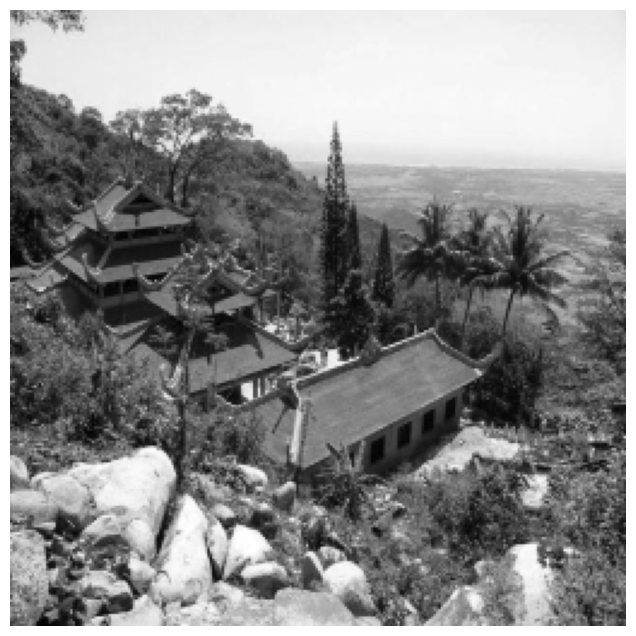

In [23]:
plt.figure(figsize=(15, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

In [24]:
img = np.array(img)

In [25]:
mag = []
theta = []
for i in range(256):
  magnitudeArray = []
  angleArray = []
  for j in range(256):
    # Condition for axis 0
    if j-1 <= 0 or j+1 >= 256:
      if j-1 <= 0:
        # Condition if first element
        Gx = img[i][j+1] - 0
      elif j + 1 >= len(img[0]):
        Gx = 0 - img[i][j-1]
    # Condition for first element
    else:
      Gx = img[i][j+1] - img[i][j-1]
    
    # Condition for axis 1
    if i-1 <= 0 or i+1 >= 256:
      if i-1 <= 0:
        Gy = 0 - img[i+1][j]
      elif i +1 >= 256:
        Gy = img[i-1][j] - 0
    else:
      Gy = img[i-1][j] - img[i+1][j]

    # Calculating magnitude
    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
    magnitudeArray.append(round(magnitude, 9))

    # Calculating angle
    if Gx == 0:
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy / Gx)))
    angleArray.append(round(angle, 9))
  mag.append(magnitudeArray)
  theta.append(angleArray)

In [26]:
mag = np.array(mag)
theta = np.array(theta)

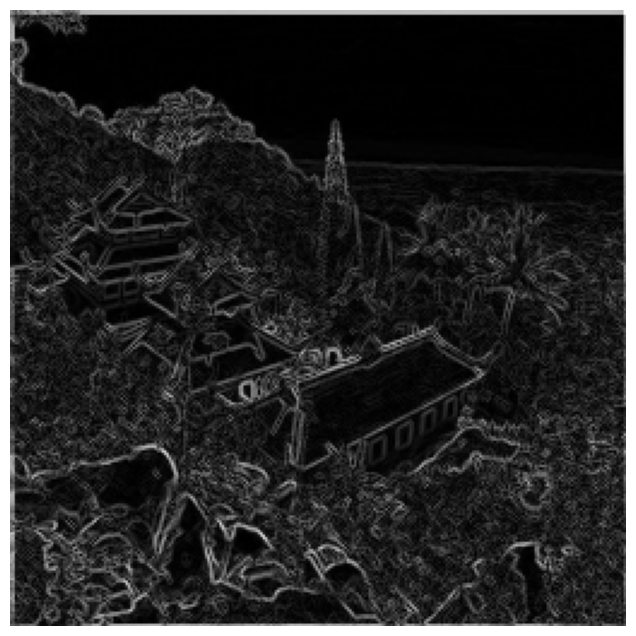

In [27]:
plt.figure(figsize=(15, 8))
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.show()

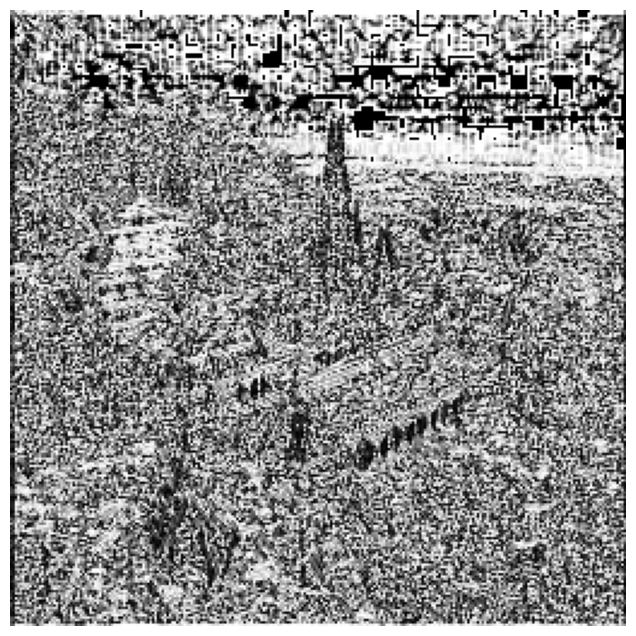

In [28]:
plt.figure(figsize=(15, 8))
plt.imshow(theta, cmap="gray")
plt.axis("off")
plt.show()

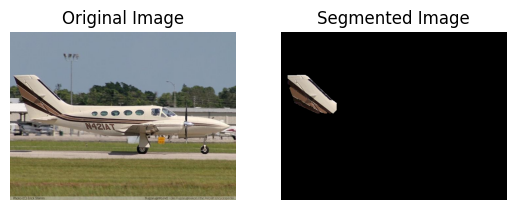

In [40]:
import cv2
# Load the image
image = cv2.imread(path)

mask = np.zeros(image.shape[:2], np.uint8)
  
# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
  
# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (20, 100, 150, 150)
  
# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3 
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used 
cv2.grabCut(image, mask, rectangle,  
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
  
# In the new mask image, pixels will 
# be marked with four flags 
# four flags denote the background / foreground 
# mask is changed, all the 0 and 2 pixels 
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
  
# The final mask is multiplied with 
# the input image to give the segmented image.
image_segmented = image * mask2[:, :, np.newaxis]
  
# output segmented image with colorbar
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
# Display the segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
plt.show()

[[1.26015125e-02]
 [1.93229353e-03]
 [2.76438170e-03]
 [3.84609634e-03]
 [2.20041093e-03]
 [1.55970296e-02]
 [1.46632418e-02]
 [5.45480009e-03]
 [2.34833770e-02]
 [1.54675944e-02]
 [2.37422492e-02]
 [6.56702444e-02]
 [5.01286872e-02]
 [1.05083488e-01]
 [4.23625335e-02]
 [9.98598263e-02]
 [5.66559583e-02]
 [1.16372153e-01]
 [2.78657079e-02]
 [6.11584783e-02]
 [3.89694609e-02]
 [3.53637449e-02]
 [4.36846279e-02]
 [4.32223566e-02]
 [6.80093393e-02]
 [7.56737962e-02]
 [1.58401847e-01]
 [1.78575367e-01]
 [1.65271193e-01]
 [9.41461474e-02]
 [5.56851886e-02]
 [3.08704693e-02]
 [6.60030842e-02]
 [2.05340870e-02]
 [2.49626450e-02]
 [2.61737946e-02]
 [7.89559167e-03]
 [1.48666417e-02]
 [1.65215731e-02]
 [9.19919647e-03]
 [1.39328539e-02]
 [4.80762031e-03]
 [8.20993632e-03]
 [1.92119908e-02]
 [3.62420618e-03]
 [6.89708628e-03]
 [8.27465393e-03]
 [2.12644751e-04]
 [1.01514757e-02]
 [2.04323861e-03]
 [3.34684341e-03]
 [5.89858042e-03]
 [3.48552479e-03]
 [8.04351876e-04]
 [2.88457214e-03]
 [3.540997

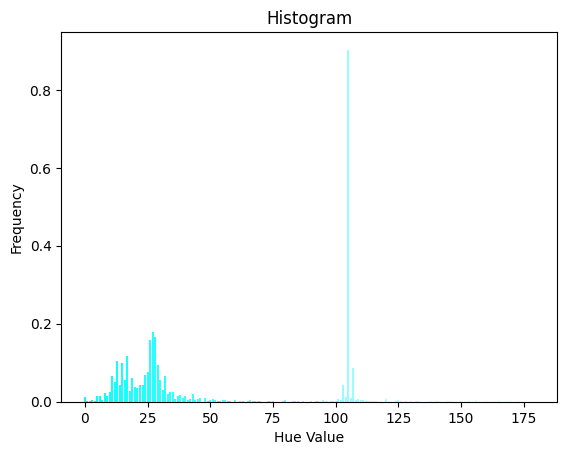

In [45]:
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image):
    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Calculate histogram for the hue channel
    hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    # Normalize histogram
    hist = cv2.normalize(hist, hist)

    return hist

# Load the image
image = cv2.imread(path)

# Calculate histogram
hist = calculate_histogram(image)

print(hist)

# Define the hue values (0-179)
hues = np.arange(180)

# Plot histogram with color-coded bars
plt.bar(hues, hist[:,0], color=[(i/180, 1, 1) for i in range(180)], edgecolor='none')
plt.title('Histogram')
plt.xlabel('Hue Value')
plt.ylabel('Frequency')
plt.show()